In [2]:
!unzip "/content/drive/My Drive/dataset/intel_image_classification.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: intel_image_classification/seg_train/mountain/7551.jpg  
  inflating: intel_image_classification/seg_train/mountain/7560.jpg  
  inflating: intel_image_classification/seg_train/mountain/7565.jpg  
  inflating: intel_image_classification/seg_train/mountain/7578.jpg  
  inflating: intel_image_classification/seg_train/mountain/7581.jpg  
  inflating: intel_image_classification/seg_train/mountain/7586.jpg  
  inflating: intel_image_classification/seg_train/mountain/7647.jpg  
  inflating: intel_image_classification/seg_train/mountain/7652.jpg  
  inflating: intel_image_classification/seg_train/mountain/7654.jpg  
  inflating: intel_image_classification/seg_train/mountain/7662.jpg  
  inflating: intel_image_classification/seg_train/mountain/767.jpg  
  inflating: intel_image_classification/seg_train/mountain/7672.jpg  
  inflating: intel_image_classification/seg_train/mountain/7679.jpg  
  inflating: intel_image_classification/seg_train/mount

In [3]:
import os
import sys
import glob
import random
import warnings
import itertools
from tqdm import tqdm
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, ElementTree
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = r"/content/intel_image_classification/"
trainFileList = os.listdir(path+"seg_train")
testFileList = os.listdir(path+"seg_test")


In [5]:
def get_images(directory):
    Images = []
    Labels = []  # 0 for Building , 1 for forest, 2 for glacier, 3 for mountain, 4 for Sea , 5 for Street
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'glacier': #Folder contain Glacier Images get the '2' class label.
            label = 2
        elif labels == 'sea':
            label = 4
        elif labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=1234) #Shuffle the dataset you just prepared.

In [6]:

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [7]:
Images, Labels = get_images('/content/intel_image_classification/seg_train/') #Extract the training images from the folders.

X_train = np.array(Images) #converting the list of images to numpy array.
y_train = np.array(Labels)


In [8]:
Images, Labels = get_images('/content/intel_image_classification/seg_test/') #Extract the training images from the folders.

X_test = np.array(Images) #converting the list of images to numpy array.
y_test = np.array(Labels)

In [9]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.2,shuffle=True,random_state=0)

In [10]:
print("X_train Shape : ",X_train.shape) # 32*32짜리 크기의 RGB 이미지 40000개
print("y_train Shape : ",y_train.shape) # 각 이미지별 레이블 40000개

X_train Shape :  (11227, 150, 150, 3)
y_train Shape :  (11227,)


In [11]:
print("X_val Shape : ",X_valid.shape) # 32*32짜리 크기의 RGB 이미지 10000개
print("y_val Shape : ",y_valid.shape) # 각 이미지별 레이블 10000개


X_val Shape :  (2807, 150, 150, 3)
y_val Shape :  (2807,)


In [12]:
print("X_train Shape : ",X_test.shape) # 32*32짜리 크기의 RGB 이미지 10000개
print("y_train Shape : ",y_test.shape) # 각 이미지별 레이블 10000개

X_train Shape :  (3000, 150, 150, 3)
y_train Shape :  (3000,)


In [13]:
X_train = X_train.reshape(X_train.shape[0],150,150,3)
X_valid = X_valid.reshape(X_valid.shape[0],150,150,3)
X_test = X_test.reshape(X_test.shape[0],150,150,3)

# 데이터 포맷 바꾸기
# 정수(int)인 데이터에서 실수(float)으로 변환
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')





In [ ]:
def basic_cnn():
  model = Sequential()
  model.add(Conv2D(input_shape=[150,150,3], filters=20, kernel_size=(3,3), 
                              strides=(1,1), padding = 'same', kernel_initializer='he_normal'))
  
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(input_shape=[150,150,3], filters=20, kernel_size=(3,3), 
                              strides=(1,1), padding = 'same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(input_shape=[150,150,3], filters=20, kernel_size=(3,3), 
                              strides=(1,1), padding = 'same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(input_shape=[150,150,3], filters=20, kernel_size=(3,3), 
                              strides=(1,1), padding = 'same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(700, activation ='relu'))
  model.add(keras.layers.Dense(300, activation ='relu'))
  model.add(keras.layers.Dense(100,activation="relu"))
  model.add(keras.layers.Dense(50, activation ='relu'))
  model.add(keras.layers.Dense(6,activation="softmax"))
  
  adam = optimizers.Adam(lr=0.001)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

  return model

In [ ]:
model = basic_cnn()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 20)      560       
_________________________________________________________________
activation_8 (Activation)    (None, 150, 150, 20)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 75, 75, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 20)        3620      
_________________________________________________________________
activation_9 (Activation)    (None, 75, 75, 20)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 37, 37, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 20)       

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10.h5", #저장할 모델 이름
                                                monitor = 'val_loss', #monitoring 할 기준
                                                save_best_only=True) 

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
351/351 [==============================] - 233s 665ms/step - loss: 7.1791 - accuracy: 0.4999 - val_loss: 1.0620 - val_accuracy: 0.5996
Epoch 2/100
351/351 [==============================] - 235s 670ms/step - loss: 0.8785 - accuracy: 0.6726 - val_loss: 0.9155 - val_accuracy: 0.6598
Epoch 3/100
351/351 [==============================] - 237s 675ms/step - loss: 0.7123 - accuracy: 0.7380 - val_loss: 0.9022 - val_accuracy: 0.6865
Epoch 4/100
351/351 [==============================] - 236s 672ms/step - loss: 0.5900 - accuracy: 0.7841 - val_loss: 0.8857 - val_accuracy: 0.7007
Epoch 5/100
351/351 [==============================] - 236s 673ms/step - loss: 0.5119 - accuracy: 0.8140 - val_loss: 0.8994 - val_accuracy: 0.6954
Epoch 6/100
351/351 [==============================] - 236s 672ms/step - loss: 0.3926 - accuracy: 0.8578 - val_loss: 0.9579 - val_accuracy: 0.6908
Epoch 7/100
351/351 [==============================] - 237s 674ms/step - loss: 0.3107 - accuracy: 0.8875 - val_loss: 1

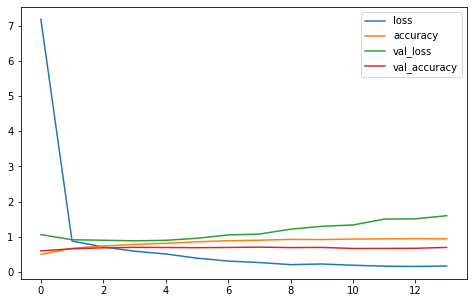

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)

94/94 [==============================] - 20s 209ms/step - loss: 0.8867 - accuracy: 0.6977


## ResNet 써보기

In [14]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization


In [15]:
input = Input(shape=(150,150,3))

In [22]:
model2 = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
x = model2.output
x = Dense(1024, name='fully')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(6, activation='softmax', name='softmax')(x)


model2 = Model(model2.input, x)

model2.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [23]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [24]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("cifar10.h5", #저장할 모델 이름
                                                monitor = 'val_loss', #monitoring 할 기준
                                                save_best_only=True) 

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model2.fit(X_train, y_train, epochs=100,batch_size=32, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
351/351 [==============================] - 65s 186ms/step - loss: 1.1978 - accuracy: 0.5235 - val_loss: 1.3943 - val_accuracy: 0.5369
Epoch 2/100
351/351 [==============================] - 67s 192ms/step - loss: 0.7789 - accuracy: 0.7132 - val_loss: 0.9918 - val_accuracy: 0.6306
Epoch 3/100
351/351 [==============================] - 66s 187ms/step - loss: 0.6257 - accuracy: 0.7787 - val_loss: 1.2616 - val_accuracy: 0.5850
Epoch 4/100
351/351 [==============================] - 68s 193ms/step - loss: 0.5378 - accuracy: 0.8061 - val_loss: 0.9788 - val_accuracy: 0.6844
Epoch 5/100
351/351 [==============================] - 66s 188ms/step - loss: 0.6175 - accuracy: 0.7841 - val_loss: 1.5580 - val_accuracy: 0.4884
Epoch 6/100
351/351 [==============================] - 67s 192ms/step - loss: 0.5297 - accuracy: 0.8124 - val_loss: 0.6094 - val_accuracy: 0.7998
Epoch 7/100
351/351 [==============================] - 66s 188ms/step - loss: 0.4771 - accuracy: 0.8307 - val_loss: 4.1955 -

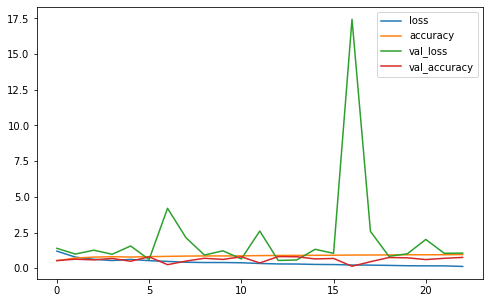

In [25]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [26]:
mse_test = model2.evaluate(X_test, y_test)

94/94 [==============================] - 5s 55ms/step - loss: 0.5850 - accuracy: 0.7940
